In [131]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [64]:
competitions=sb.competitions()

In [65]:
print(competitions["competition_name"].unique())

['1. Bundesliga' 'African Cup of Nations' 'Champions League'
 'Copa America' 'Copa del Rey' "FA Women's Super League"
 'FIFA U20 World Cup' 'FIFA World Cup' 'Indian Super league' 'La Liga'
 'Liga Profesional' 'Ligue 1' 'Major League Soccer'
 'North American League' 'NWSL' 'Premier League' 'Serie A' 'UEFA Euro'
 'UEFA Europa League' "UEFA Women's Euro" "Women's World Cup"]


In [66]:
comp_id=competitions.loc[
competitions["competition_name"]=="Premier League","competition_id"
].values[0]

In [67]:
comp_id

np.int64(2)

In [68]:
print(competitions[["competition_id", "competition_name", "season_name","season_id"]].to_string())

    competition_id         competition_name season_name  season_id
0                9            1. Bundesliga   2023/2024        281
1                9            1. Bundesliga   2015/2016         27
2             1267   African Cup of Nations        2023        107
3               16         Champions League   2018/2019          4
4               16         Champions League   2017/2018          1
5               16         Champions League   2016/2017          2
6               16         Champions League   2015/2016         27
7               16         Champions League   2014/2015         26
8               16         Champions League   2013/2014         25
9               16         Champions League   2012/2013         24
10              16         Champions League   2011/2012         23
11              16         Champions League   2010/2011         22
12              16         Champions League   2009/2010         21
13              16         Champions League   2008/2009       

In [69]:
df=sb.matches(competition_id=55,season_id=282)

In [70]:
df.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
4,3942349,2024-07-05,22:00:00.000,Europe - UEFA Euro,2024,Portugal,France,0,0,available,...,2024-07-12T02:00:16.871522,5,Quarter-finals,Volksparkstadion,Michael Oliver,Roberto Martínez Montoliú,Didier Deschamps,1.1.0,2,2


In [71]:
england_matches = df[
    (df['home_team'] == 'England') |
    (df['away_team'] == 'England')
]

In [72]:
england_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
6,3930171,2024-06-20,19:00:00.000,Europe - UEFA Euro,2024,Denmark,England,1,1,available,...,2024-07-12T05:19:44.572914,2,Group Stage,Deutsche Bank Park,Artur Manuel Ribeiro Soares Dias,Kasper Hjulmand,Gareth Southgate,1.1.0,2,2
7,3942227,2024-07-06,19:00:00.000,Europe - UEFA Euro,2024,England,Switzerland,1,1,available,...,2024-07-14T15:57:51.414762,5,Quarter-finals,Merkur Spiel-Arena,Daniele Orsato,Gareth Southgate,Murat Yakin,1.1.0,2,2
16,3941017,2024-06-30,19:00:00.000,Europe - UEFA Euro,2024,England,Slovakia,2,1,available,...,2024-07-10T11:31:44.852038,4,Round of 16,VELTINS-Arena,Halil Umut Meler,Gareth Southgate,Francesco Calzona,1.1.0,2,2
38,3930181,2024-06-25,22:00:00.000,Europe - UEFA Euro,2024,England,Slovenia,0,0,available,...,2024-07-10T14:27:59.561474,3,Group Stage,RheinEnergieStadion,Clément Turpin,Gareth Southgate,Matjaž Kek,1.1.0,2,2
46,3930163,2024-06-16,22:00:00.000,Europe - UEFA Euro,2024,Serbia,England,0,1,available,...,2024-07-14T07:10:41.937955,1,Group Stage,VELTINS-Arena,Daniele Orsato,Dragan Stojković,Gareth Southgate,1.1.0,2,2


In [73]:
match_id=3942819	

In [74]:
match_events_df=sb.events(match_id=match_id)

In [75]:
match_events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [76]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [77]:
match_events_df=match_events_df[["location","timestamp"]]

In [78]:
match_events_df

,location,timestamp
26,"[44.6, 20.3]",00:01:32.571
30,"[38.6, 14.9]",00:01:40.503
35,"[63.8, 42.6]",00:01:51.958
36,"[69.5, 28.0]",00:01:55.718
41,"[63.0, 12.1]",00:02:07.896
...,...,...
3432,"[97.8, 41.9]",00:27:30.617
3433,"[102.7, 4.8]",00:42:59.393
3456,NaN,00:09:29.293
3461,NaN,00:09:29.875


In [79]:
touches_df = match_events_df.dropna()

In [80]:
touches_df

,location,timestamp
26,"[44.6, 20.3]",00:01:32.571
30,"[38.6, 14.9]",00:01:40.503
35,"[63.8, 42.6]",00:01:51.958
36,"[69.5, 28.0]",00:01:55.718
41,"[63.0, 12.1]",00:02:07.896
...,...,...
3362,"[8.8, 36.7]",00:29:08.729
3378,"[9.0, 35.5]",00:19:53.722
3389,"[74.1, 28.6]",00:41:54.086
3432,"[97.8, 41.9]",00:27:30.617


In [81]:
match_id=3943043

In [82]:
match_events_df=sb.events(match_id=match_id)

In [83]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [84]:
match_events_df=match_events_df[["location","timestamp"]]

In [85]:
match_events_df

,location,timestamp
14,"[50.3, 2.0]",00:00:59.691
23,"[35.5, 15.2]",00:01:35.849
166,"[55.8, 3.0]",00:14:00.770
169,"[67.3, 17.3]",00:14:36.677
183,"[56.2, 14.9]",00:16:04.228
...,...,...
3217,"[56.4, 7.7]",00:31:43.520
3222,"[44.0, 58.1]",00:26:55.891
3241,"[99.0, 37.2]",00:18:12.951
3291,"[36.8, 11.8]",00:37:24.345


In [86]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [87]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
361,"[56.4, 7.7]",00:31:43.520
362,"[44.0, 58.1]",00:26:55.891
363,"[99.0, 37.2]",00:18:12.951
364,"[36.8, 11.8]",00:37:24.345


In [88]:
match_id=3930171

In [89]:
match_events_df=sb.events(match_id=match_id)

In [90]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [91]:
match_events_df=match_events_df[["location","timestamp"]]

In [92]:
match_events_df

,location,timestamp
32,"[55.0, 10.2]",00:01:33.288
54,"[56.2, 50.5]",00:02:40.086
101,"[72.2, 38.4]",00:05:07.155
115,"[43.3, 31.1]",00:05:46.469
117,"[42.6, 17.2]",00:05:49.752
...,...,...
3790,"[55.7, 26.9]",00:36:17.848
3792,"[55.9, 10.4]",00:12:19.865
3825,"[55.1, 28.1]",00:45:08.436
3844,"[13.8, 15.2]",00:22:21.165


In [93]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [94]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
550,"[55.7, 26.9]",00:36:17.848
551,"[55.9, 10.4]",00:12:19.865
552,"[55.1, 28.1]",00:45:08.436
553,"[13.8, 15.2]",00:22:21.165


In [95]:
match_id=3942227

In [96]:
match_events_df=sb.events(match_id=match_id)

In [97]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [98]:
match_events_df=match_events_df[["location","timestamp"]]

In [99]:
match_events_df

,location,timestamp
21,"[32.4, 5.5]",00:00:53.283
51,"[70.5, 19.6]",00:03:08.684
82,"[49.1, 16.3]",00:05:29.327
84,"[48.5, 15.9]",00:05:32.914
100,"[78.8, 25.5]",00:06:14.128
...,...,...
4745,"[103.8, 44.8]",00:11:06.027
4752,"[108.1, 40.1]",00:01:59.218
4813,"[117.2, 10.3]",00:27:18.431
4824,"[75.6, 8.1]",00:21:58.775


In [100]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [101]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
816,"[103.8, 44.8]",00:11:06.027
817,"[108.1, 40.1]",00:01:59.218
818,"[117.2, 10.3]",00:27:18.431
819,"[75.6, 8.1]",00:21:58.775


In [102]:
match_id=3941017

In [103]:
match_events_df=sb.events(match_id=match_id)

In [104]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [105]:
match_events_df=match_events_df[["location","timestamp"]]

In [106]:
match_events_df

,location,timestamp
38,"[70.9, 51.1]",00:01:52.206
46,"[64.0, 68.1]",00:02:22.853
124,"[83.4, 67.5]",00:08:48.186
136,"[78.3, 14.5]",00:09:48.851
144,"[91.1, 41.2]",00:10:09.172
...,...,...
4576,"[111.7, 40.2]",00:13:22.316
4582,"[110.1, 40.9]",00:49:33.833
4712,"[97.9, 77.8]",00:37:26.763
4743,"[51.5, 58.4]",00:08:58.088


In [107]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [108]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
991,"[111.7, 40.2]",00:13:22.316
992,"[110.1, 40.9]",00:49:33.833
993,"[97.9, 77.8]",00:37:26.763
994,"[51.5, 58.4]",00:08:58.088


In [109]:
match_id=3930181

In [110]:
match_events_df=sb.events(match_id=match_id)

In [111]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [112]:
match_events_df=match_events_df[["location","timestamp"]]

In [113]:
match_events_df

,location,timestamp
19,"[36.5, 13.4]",00:00:41.560
28,"[48.5, 26.7]",00:01:10.924
52,"[62.1, 11.8]",00:03:22.923
86,"[74.5, 18.3]",00:06:19.481
120,"[70.6, 5.2]",00:08:18.730
...,...,...
3638,"[86.3, 17.9]",00:24:23.317
3648,"[113.6, 56.6]",00:03:32.057
3651,"[106.5, 49.4]",00:08:27.921
3654,"[94.2, 69.9]",00:34:59.538


In [114]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [115]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
1209,"[86.3, 17.9]",00:24:23.317
1210,"[113.6, 56.6]",00:03:32.057
1211,"[106.5, 49.4]",00:08:27.921
1212,"[94.2, 69.9]",00:34:59.538


In [116]:
match_id=3930163

In [117]:
match_events_df=sb.events(match_id=match_id)

In [118]:
match_events_df=match_events_df[match_events_df["player"]=="Jude Bellingham"]

In [119]:
match_events_df=match_events_df[["location","timestamp"]]

In [120]:
match_events_df

,location,timestamp
16,"[39.6, 24.8]",00:00:35.486
18,"[59.8, 5.1]",00:00:41.158
27,"[92.7, 24.8]",00:01:06.930
38,"[82.0, 70.6]",00:01:38.606
41,"[87.9, 75.4]",00:01:46.385
...,...,...
3846,"[57.9, 31.0]",00:24:00.967
3855,"[113.4, 39.5]",00:12:11.573
3888,"[75.7, 29.3]",00:44:52.754
3898,NaN,00:40:08.981


In [121]:
touches_df = pd.concat([touches_df, match_events_df], ignore_index=True)

In [122]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
1493,"[57.9, 31.0]",00:24:00.967
1494,"[113.4, 39.5]",00:12:11.573
1495,"[75.7, 29.3]",00:44:52.754
1496,NaN,00:40:08.981


In [123]:
touches_df = touches_df.dropna()

In [124]:
touches_df

,location,timestamp
0,"[44.6, 20.3]",00:01:32.571
1,"[38.6, 14.9]",00:01:40.503
2,"[63.8, 42.6]",00:01:51.958
3,"[69.5, 28.0]",00:01:55.718
4,"[63.0, 12.1]",00:02:07.896
...,...,...
1491,"[77.5, 33.3]",00:39:54.427
1492,"[111.1, 43.6]",00:11:06.330
1493,"[57.9, 31.0]",00:24:00.967
1494,"[113.4, 39.5]",00:12:11.573


In [126]:
touches_df[['x', 'y']] = pd.DataFrame(
    touches_df['location'].tolist()
)

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12236\779887166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  touches_df[['x', 'y']] = pd.DataFrame(
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12236\779887166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  touches_df[['x', 'y']] = pd.DataFrame(


In [127]:
touches_df

,location,timestamp,x,y
0,"[44.6, 20.3]",00:01:32.571,44.6,20.3
1,"[38.6, 14.9]",00:01:40.503,38.6,14.9
2,"[63.8, 42.6]",00:01:51.958,63.8,42.6
3,"[69.5, 28.0]",00:01:55.718,69.5,28.0
4,"[63.0, 12.1]",00:02:07.896,63.0,12.1
...,...,...,...,...
1491,"[77.5, 33.3]",00:39:54.427,111.1,43.6
1492,"[111.1, 43.6]",00:11:06.330,57.9,31.0
1493,"[57.9, 31.0]",00:24:00.967,113.4,39.5
1494,"[113.4, 39.5]",00:12:11.573,75.7,29.3


C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12236\4000763129.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(


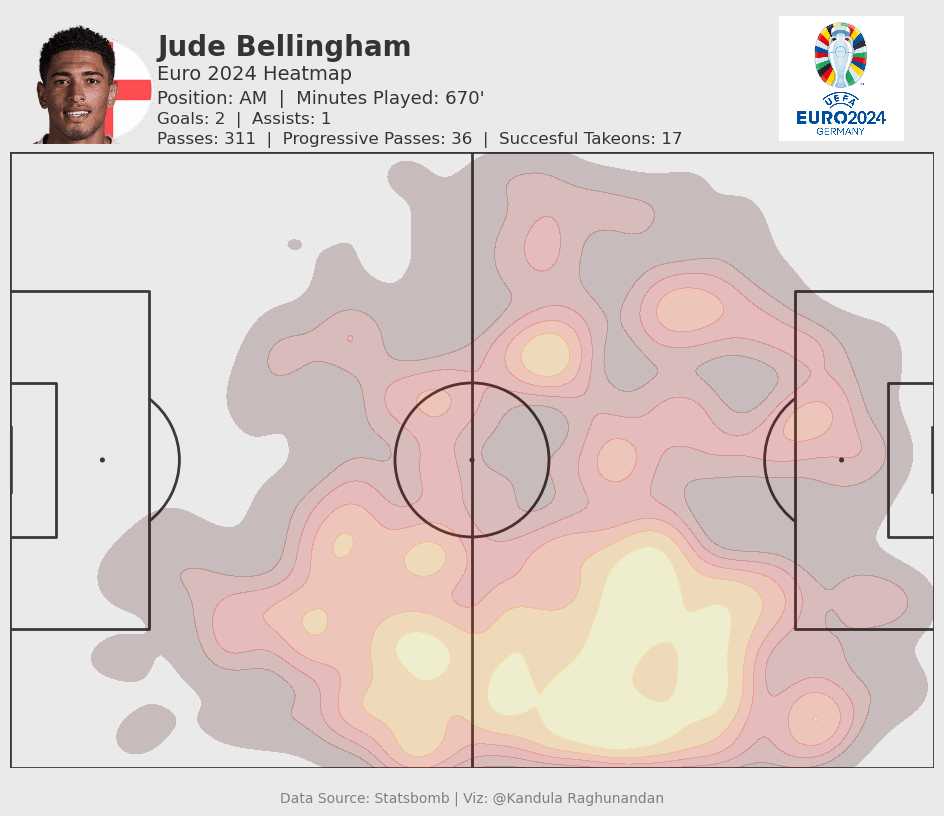

In [158]:
fig, ax= plt.subplots(figsize=(12,8))
fig.set_facecolor("#EAEAEA")
ax.patch.set_facecolor("#EAEAEA")

pitch = Pitch(pitch_type='statsbomb', pitch_color='#EAEAEA', line_color='#3A3A3A')
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

plt.xlim(0,120)
plt.ylim(0,80)

kde=sns.kdeplot(
    data=touches_df, x="x", y="y",
    shade=True,
    shade_lowest=False,
    alpha=.2,
    bw_adjust=0.5,
    n_levels=7,
    cmap="hot"
)

fig.text(0.25, 1, "Jude Bellingham", fontsize=20, fontweight='bold', color='#343434')
fig.text(0.25, 0.97, "Euro 2024 Heatmap", 
         fontsize=14, color='#343434')
fig.text(0.25, 0.94, "Position: AM  |  Minutes Played: 670'", 
         fontsize=13, color='#343434')

team_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/International/England.png")
player_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Players/Jude Bellingham.png")
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/International/Euro_2024.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax, team_logo, zoom=0.38, xy=(0.1, 1.1))
add_logo(ax, player_logo, zoom=0.45, xy=(0.072, 1.11))
add_logo(ax,league_logo,zoom=0.15, xy=(0.9,1.12))

fig.text(0.25, 0.915, "Goals: 2  |  Assists: 1", fontsize=12, color='#343434')
fig.text(0.25, 0.89, "Passes: 311  |  Progressive Passes: 36  |  Succesful Takeons: 17", fontsize=12, color='#343434')

plt.text(
    0.5, -0.05, "Data Source: Statsbomb | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig(r"C:\Users\K Raghunandan\Analyst\Results\Jude_Bellingham_Euro_2024.jpg",bbox_inches='tight')